In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [6]:
# Define the folder path
folder_path = "../results"

# Get the list of .csv files containing "aoxu" keyword
file_list = [file for file in os.listdir(folder_path) if file.endswith(".csv") and "aoxu" in file]

# Initialize an empty DataFrame to store the data
df_combined = pd.DataFrame()

# Iterate over each file
for file in file_list:
    # Load the .csv file
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    
    # Extract the required columns
    df_selected = df[['molid', 'Score', df.columns[-1]]]
    if 'molid' not in df_combined.columns:
        df_combined = df_selected
    else:
        # Merge the selected data with the combined DataFrame
        df_combined = pd.merge(df_combined, df_selected, on=['molid', 'Score'], how='outer')

# Display the combined DataFrame
df_combined

,molid,Score,aoxu_nnetregCG_100K,aoxu_nnetregCG_1M,aoxu_nnetregCG_500K
0,1,-25.63,-22.42,-21.60,-22.53
1,2,-23.03,-22.53,-21.78,-22.52
2,3,-20.79,-22.53,-21.78,-22.52
3,4,-20.35,-22.53,-21.78,-22.52
4,5,-18.78,-22.53,-21.78,-22.52
...,...,...,...,...,...
9995,9996,-10.93,-17.28,-19.53,-17.85
9996,9997,-13.38,-17.21,-19.33,-17.84
9997,9998,-13.11,-17.81,-19.57,-17.51
9998,9999,-22.01,-17.28,-19.53,-17.85


In [7]:
from sklearn.metrics import r2_score, explained_variance_score

# Iterate over each column starting from the 3rd column
for column in df_combined.columns[2:]:
    # Compute R^2 score
    r2 = r2_score(df_combined['Score'], df_combined[column])

    # Compute Q^2 score
    q2 = explained_variance_score(df_combined['Score'], df_combined[column])

    print(f"Column: {column}")
    print(f"R^2 Score: {r2}")
    print(f"Q^2 Score: {q2}")
    print()


Column: aoxu_nnetregCG_100K
R^2 Score: -0.05960137858552894
Q^2 Score: -0.05340372793638681

Column: aoxu_nnetregCG_1M
R^2 Score: -0.13735059039629727
Q^2 Score: -0.05050949567552476

Column: aoxu_nnetregCG_500K
R^2 Score: -0.1635285634530863
Q^2 Score: -0.16324710322350477



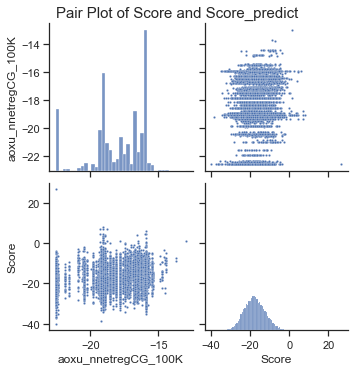

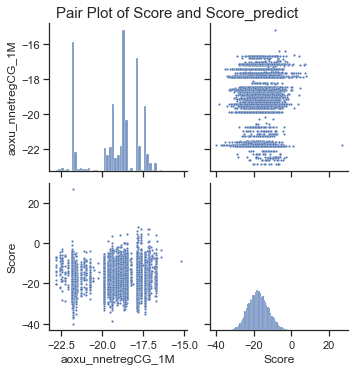

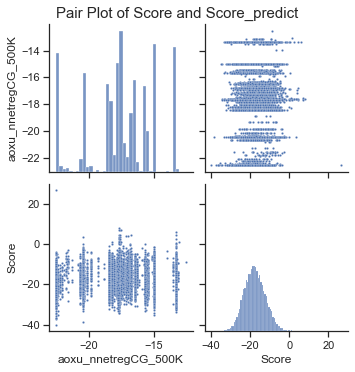

In [11]:
import seaborn as sns
# Iterate over each column starting from the 3rd column
for column in df_combined.columns[2:]:
    # Set the style of the plot
    sns.set(style="ticks")
    pair_plot = sns.pairplot(df_combined, vars=[f'{column}', 'Score'],diag_kind='hist', plot_kws={'s': 5})  # 's' controls the size of the scatter points
    # Set the plot title
    pair_plot.fig.suptitle('Pair Plot of Score and Score_predict', size=15, y=1.02)
    # Save the plot
    plt.savefig(f'./analysis{column}_pairplot.png')
    # plt.show()